# CPSC 483-01: Project 2, Group 2, Fall 2021 
**Group Members:**
- Nicole Serna
- Zachary Serna

In [27]:
#Experiment 1
import numpy as np

#loads in dataset, removing first row
dataSet = np.loadtxt(open("dataset.csv"), delimiter=",", skiprows=1)

#examine first few rows
for i in range(0,4):
    print(dataSet[i])

[-0.59828843  0.46192254 -1.34862803]
[-1.74575782 -1.41239652  1.67154097]
[-1.16639696 -0.06900688 -1.99250735]
[-0.86156208 -1.6482701   1.39107574]


Results for Experiment 1:

[-0.59828843  0.46192254 -1.34862803]

[-1.74575782 -1.41239652  1.67154097]

[-1.16639696 -0.06900688 -1.99250735]

[-0.86156208 -1.6482701   1.39107574]



We load in the data via np.loadtxt and then seperate the data by every comma, skipping the first row as it is not needed.

In [28]:
#Experiment 2

#Seperates the data based on columns x_1,x_2 and t
x_1 = dataSet[:,0][:,None]
x_2 = dataSet[:,1][:,None]
t = dataSet[:,2][:,None]

#sets aside first 100 in dataset for testing
x1_test = dataSet[:,0][0:100]
x2_test = dataSet[:,1][0:100]
t_test = dataSet[:,2][0:100]
x1_train = dataSet[:,0][100:1000]
x2_train = dataSet[:,1][100:1000]
t_train = dataSet[:,2][100:1000]


Results of Experiment 2:

We divide the data appropriately into $x_1$ , $x_2$ , and $t$ columns, setting aside the first 10% of the data as a test set.

In [29]:
#Experiment 3

#reshapes the data so it can be fit into a linear model
x1_train = np.reshape(x1_train, (-1, 1))
x2_train = np.reshape(x2_train, (-1, 1))

#Finds big X and the transpose of big X. Then find the inverse of transposeX and X
#then multiply by transposeX and t to find W
X = np.hstack((np.ones_like(x1_train),x1_train,x2_train))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t_train)
w = np.dot(invXX,Xt)
print(w)

[0.59088086 0.04935279 0.00763617]


Result for Experiment 3:

we found $w$:

[0.59088086 0.04935279 0.00763617]

We first reshape the $x_1$ and $x_2$ training sets,

then, we use:

$w = (X^TX)^-1X^Tt$

to compute $w$.

The equation we used for $y$:

$y = w_0 + w_1x_1 + w_2x_2$

In [30]:
#Experiment 4

#computes predicated response for each val in training set
tnew = np.dot(X,w)
total = 0

#Finds MSE by comparing predicted response to actual value in the training set
# value is then squared to increase impact of outliers
for i in range(900):
    residual = (t_train[i] - tnew[i])
    residual = residual*residual
    total += residual
MSE = total/900
print("Average loss :",MSE)

Average loss : 8.59124007116325


Results of Experiment 4:

We found the average loss of the linear model to be: 8.59124007116325 

In [31]:
#Experiment 5

#Adding the x^2 component to x1 and x2 to fit a quadratic model
X = np.hstack((np.ones_like(x1_train),x1_train,x2_train, (x1_train**2), (x2_train**2)))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t_train)
wQuad = np.dot(invXX,Xt)
#print(wQuad)
errors = np.subtract(t_train,(np.dot(X,wQuad)))
mse = np.sum(np.dot(errors.T,errors))/x1_train.size         
print("MSE:", mse)

MSE: 8.58031028984494


Results for Experiment 5:

we converted our linear model to a quadratic model by adding the $x^2$ component to $x_1$ and $x_2$. We then proceeded to calculate the MSE using the added quadratic features.

The equation for the quadratic model would be as follows:

$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$


MSE for the quadratic model: 8.58031028984494



In [32]:
#Experiment 6

x1_test = np.reshape(x1_test, (-1, 1))
x2_test = np.reshape(x2_test, (-1, 1))

#MSE for Linear Model, on test set
X = np.hstack((np.ones_like(x1_test),x1_test,x2_test))
tnew = np.dot(X,w)
total = 0
for i in range(100):
    residual = (t_test[i] - tnew[i])
    residual = residual**2
    total += residual
lossL = total/100
print("Linear model MSE :",lossL)


#MSE for Quadratic Model, on test set
X = np.hstack((np.ones_like(x1_test),x1_test,x2_test, (x1_test**2), (x2_test**2)))
tnew = np.dot(X,wQuad)
total = 0
for i in range(100):
    residual = (t_test[i] - tnew[i])
    residual = residual**2
    total += residual
LossQ = total/100
print("Quadratic model MSE :", LossQ)

Linear model MSE : 8.000051210628886
Quadratic model MSE : 7.981788347179423


Results for Experiment 6:

Linear model MSE: 8.000051210628886

Quadratic model MSE: 7.981788347179423

Based on the results of the experiments above, it appears the quadratic model performs better than the linear model on the test data.

In [33]:
#Experiment 7


#variables for training set/validation set
N = 900
x1 = x1_train
x2 = x2_train
t = dataSet[:,2][100:1000]
N_test = 100
max_order = 8
X = []
X_test = []
K = 5
sizes = np.tile(int(N/float(5)),(1,K))
sizes[0,-1] = sizes[0,-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
X = np.ones_like(x1)
X_test = np.ones_like(x1_test)
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))


#Implementation of 5-fold cross validation based off code provided by the
#Jupyter notebooks
for k in range(max_order+1):
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        wFold = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,t_train))
        fold_pred = np.dot(X_fold,wFold)
        cv_loss[fold,k] = ((fold_pred - t_fold)**2).mean()
        ind_pred = np.dot(X_test,wFold)
        ind_loss[fold,k] = ((ind_pred - t_test)**2).mean()
        train_pred = np.dot(X_train,wFold)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()
    X = np.hstack((X,x1**(k+1),x2**(k+1)))
    X_test = np.hstack((X_test,x1_test**(k+1),x2_test**(k+1)))

In [34]:
#Prints the results of Experiment 7
TotalCV = 0
TotalT = 0
AvgCV = np.zeros(8)
AvgT = np.zeros(8)
for j in range(8):
    for i in range(5):
        TotalCV += cv_loss[i,j]
    AvgCV[j] = TotalCV/5
    print("Average Validation MSE for polynomial order",j + 1,":", AvgCV[j])
    TotalCV = 0
for j in range(8):
    for i in range(5):
        TotalT += train_loss[i,j]
    AvgT[j] = TotalT/5
    print("Average Training MSE for polynomial order",j + 1,":", AvgT[j])
    TotalT = 0

Average Validation MSE for polynomial order 1 : 8.616659592643767
Average Validation MSE for polynomial order 2 : 8.705450904235743
Average Validation MSE for polynomial order 3 : 8.766185448440574
Average Validation MSE for polynomial order 4 : 8.801072666142236
Average Validation MSE for polynomial order 5 : 8.91342013995537
Average Validation MSE for polynomial order 6 : 8.883870263417933
Average Validation MSE for polynomial order 7 : 8.8722823906627
Average Validation MSE for polynomial order 8 : 8.897833169094147
Average Training MSE for polynomial order 1 : 8.59520346668739
Average Training MSE for polynomial order 2 : 8.578570080490914
Average Training MSE for polynomial order 3 : 8.560025483609571
Average Training MSE for polynomial order 4 : 8.551558443153231
Average Training MSE for polynomial order 5 : 8.533943529053811
Average Training MSE for polynomial order 6 : 8.444445055574175
Average Training MSE for polynomial order 7 : 8.417432096850757
Average Training MSE for pol

Results for Experiment 7: 

We used our training data to conduct 5-fold cross validation. The results can be seen in the print statement above.

Text(0, 0.5, 'Mean squared loss')

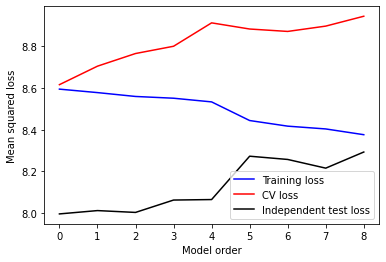

In [35]:
#Experiment 8

import pylab as plt
%matplotlib inline
order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

Results for Experiment 8:

Based on the model above, we can see the model begins to overfit the data around the 6th model, as the CV Loss begins to rise again after dipping slightly.

Results for Experiment 9(no code involved):

Based on the results of the experiments we conducted above, the best model appears to be the linear model. The equation for the linear model would be:

$y = w_0 + w_1x_1 +w_2x_2$

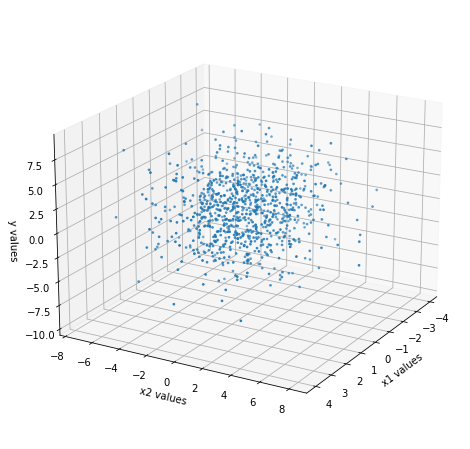

In [36]:
#Experiment 10

import matplotlib.pyplot as plt


x1_train = dataSet[:,0][100:1000]
x2_train = dataSet[:,1][100:1000]
t_train = dataSet[:,2][100:1000]

#Sets up scatterplot, graphing x1,x2, and y as the x,y and z axes respectively
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1_train, x2_train, t_train, s = 3)

ax.set_xlabel('x1 values')
ax.set_ylabel('x2 values')
ax.set_zlabel('y values')

ax.view_init(20,30)

plt.show()

Results of Experiment 10:

Based on the scatterplot above, we cannot see a pattern, other than the fact that the points seem to clump together towards the center, implying a gaussian distribution of the data.

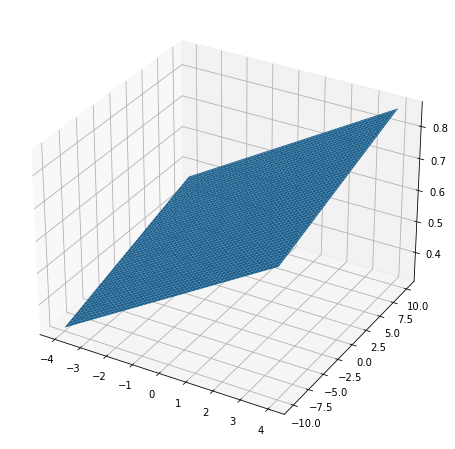

In [37]:
#Experiment 11

#Linear surface plot/Best fitting model for training set
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x1, x2)
Z = w[0]*np.ones_like(X)+ w[1]*X + w[2]*Y
ax.plot_surface(X, Y, Z)
plt.show()

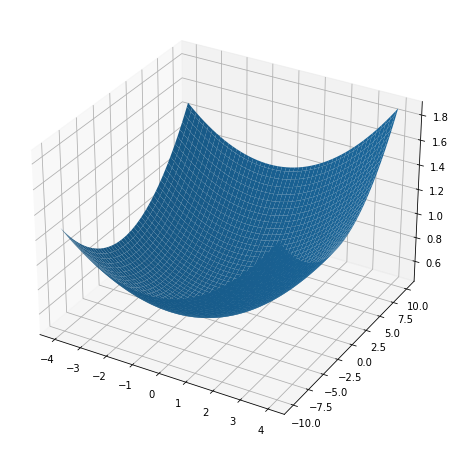

In [38]:
#Quadratic surface plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x1, x2)
Z = wQuad[0]*np.ones_like(X)+ wQuad[1]*X+ wQuad[2]*Y + wQuad[3]*(X**2) +wQuad[4]*(Y**2)
ax.plot_surface(X, Y, Z)
plt.show()

Results for Experiment 11:

We plotted the models from Experiments 3,5 and 9.We only needed 2 surface plots since the Linear model was what we found to be the best fitting model of the training set.

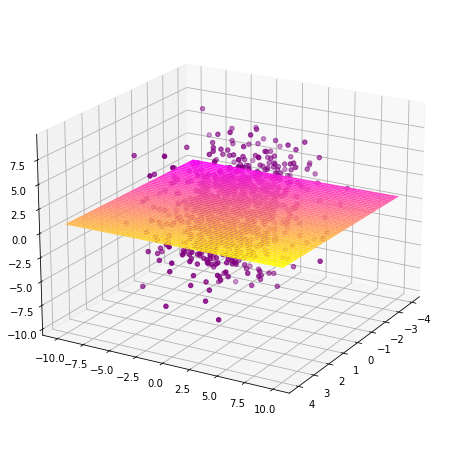

In [39]:
#Experiment 12


#The best fitting 3d surface from the previous experiment according to our model is the linear model.
#Plotting this with the scatterplot from experiment 10
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1_train, x2_train, t_train, c="purple")
ax.view_init(20,30)

x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x1, x2)
Z = w[0]*np.ones_like(X)+ w[1]*X+ w[2]*Y
ax.plot_surface(X, Y, Z,cmap='spring')

plt.show()

Based on the distribution of the data, we can see the data likely was not generated completely randomly as the distribution of the data seems to be more condensed in certain areas. As such the data likely had some sort of bias that was normalizing the data.